In [9]:
from utils import adf_test
import pandas as pd
from utils import plot_autocorrelations, adf_test, split_fixed, split_ratio
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
warnings.filterwarnings("ignore")

df = pd.read_csv("data/inflation.csv", parse_dates=True, index_col="Month")
df = df[df.index >= "2005-01-01"]





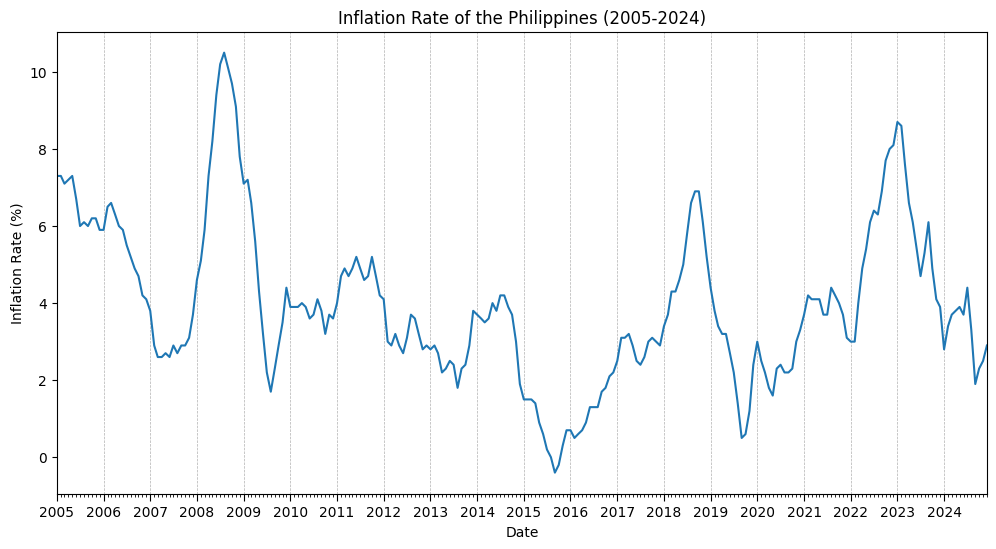

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))


ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
# Optional: format ticks
ax.tick_params(axis='x', which='major', length=5)  # major ticks
ax.tick_params(axis='x', which='minor', length=2)  # minor ticks, no labels
ax.grid(axis="x", linestyle='--', linewidth=0.5)
ax.set_xlim(df.index.min(), df.index.max())
ax.set_title("Inflation Rate of the Philippines (2005-2024)")
ax.set_ylabel("Inflation Rate (%)")
ax.set_xlabel("Date")

ax.plot(df["Inflation"], label="Inflation Rate")

plt.show()


In [ ]:
train, test = split_ratio(df["Inflation"])
plot_autocorrelations(train)
adf_test(train)

In [2]:
from pmdarima import auto_arima

model = auto_arima(train, stationary=True)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  192
Model:               SARIMAX(3, 0, 1)   Log Likelihood                 -87.256
Date:                Sun, 04 May 2025   AIC                            186.511
Time:                        10:44:43   BIC                            206.056
Sample:                    01-01-2005   HQIC                           194.427
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3006      0.123      2.438      0.015       0.059       0.542
ar.L1          0.6683      0.077      8.669      0.000       0.517       0.819
ar.L2          0.7304      0.107      6.802      0.000       0.520       0.941
ar.L3         -0.4756      0.069     -6.844      0.000      -0.612      -0.339
ma.L1          0.9575      0.041     23.370      0.000       0.877       1.038
sigma2         0.1421      0.016      8.761      0.000       0.110       0.174
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.68   Prob(JB):                         0.56
Heteroskedasticity (H):               0.68   Skew:                             0.01
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [3]:
from utils import get_metrics
from statsmodels.tsa.arima.model import ARIMA
m = ARIMA(train, order=model.order).fit()
get_metrics(
    test,
    m.forecast(len(test)),
)

,Metric,Value
0,MAE,1.363955
1,MAPE,0.263284
2,MSE,3.662110


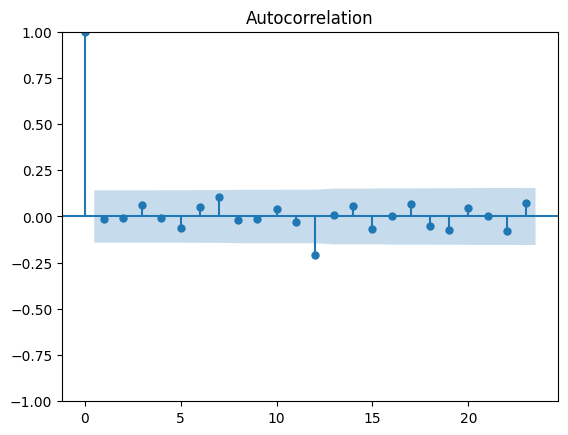

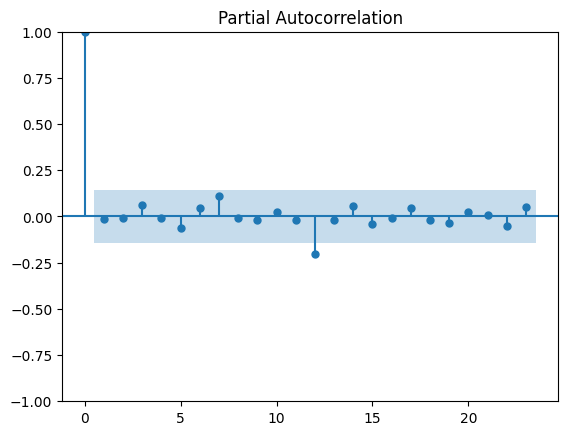

In [4]:
# plot_autocorrelations(pd.DataFrame(m.resid, columns=["Inflation"])["Inflation"])
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


_ = plot_acf(m.resid)
_ = plot_pacf(m.resid)

In [5]:
from statsmodels.stats.diagnostic import acorr_ljungbox


acorr_ljungbox(m.resid, lags=24)


,lb_stat,lb_pvalue
1,0.035015,0.851565
2,0.048894,0.975849
3,0.813496,0.846236
4,0.832808,0.933996
5,1.588979,0.902579
6,2.068831,0.913261
7,4.336750,0.740276
8,4.409872,0.818381
9,4.436465,0.880414
10,4.771243,0.905926


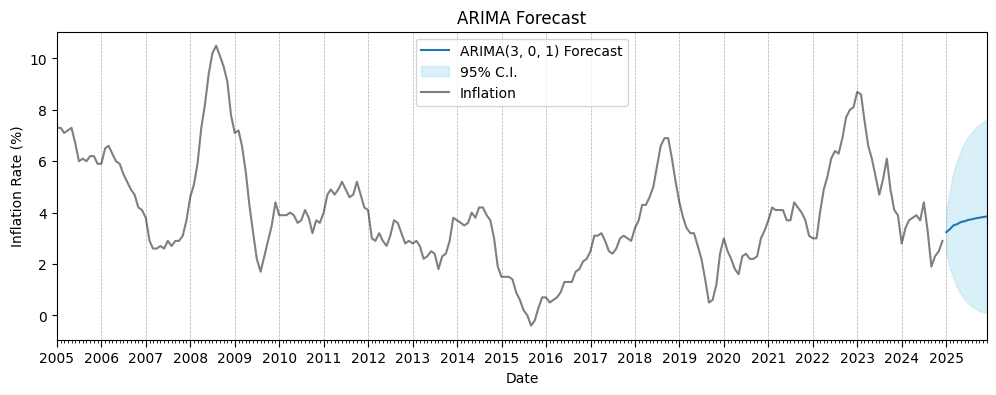

In [6]:
from models import ARIMA_forecast


ARIMA_forecast(df["Inflation"], order=model.order)